# Accident Severity Prediction -- Internship Task 2 

#### 1. Import Libraries

In [6]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.3/150.0 MB 2.3 MB/s eta 0:01:05
    --------------------------------------- 2.1/150.0 MB 2.6 MB/s eta 0:00:57
    --------------------------------------- 2.6/150.0 MB 2.6 MB/s eta 0:00:57
    --------------------------------------- 2.9/150.0 MB 2.5 MB/s eta 0:00:58
    --------------------------------------- 3.4/150.0 MB 2.5 MB/s eta 0:00:59
   - -------------------------------------- 3.9/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 4.2/150.0 MB 2.4 MB/s eta 0:01:01
   - -------------------------------------- 4.7/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 5.2/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 5.8/150.0 MB 2.3 MB/s eta 0:01:02


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#### 2. Load Dataset

In [36]:
train=pd.read_csv('combined_accident_data.csv')

In [38]:
df.head(5)

,Num_Acc,inverse_data,week_day,state,severity,weather,location,hrmn,lum,vehicle_type,...,casualty_type,pedestrian_or_passenger,severity_description,weather_description,location_description,vehicle_type_description,engine_size_description,driver_sex_description,casualty_severity_description,casualty_type_description
0,AID0001,2022-11-20,T,WB,Minor,Storm,Loc91,1958,Daylight,Car,...,Pedestrian,Pedestrian,"Severity of the accident (Minor, Moderate, Sev...","Weather conditions during the accident (Clear,...",Location ID of accident spot,Type of vehicle involved in the accident,Engine size of the vehicle involved,Gender of the driver involved,"Severity of the casualty (Slight, Serious, Fatal)","Type of casualty (Pedestrian, Car Passenger, C..."
1,AID0002,2023-12-09,T,TR,Severe,Fog,Loc184,2245,Daylight,Car,...,Pedestrian,Pedestrian,"Severity of the accident (Minor, Moderate, Sev...","Weather conditions during the accident (Clear,...",Location ID of accident spot,Type of vehicle involved in the accident,Engine size of the vehicle involved,Gender of the driver involved,"Severity of the casualty (Slight, Serious, Fatal)","Type of casualty (Pedestrian, Car Passenger, C..."
2,AID0003,2022-11-12,W,HP,Moderate,Fog,Loc77,250,Twilight,Car,...,Car Passenger,Pedestrian,"Severity of the accident (Minor, Moderate, Sev...","Weather conditions during the accident (Clear,...",Location ID of accident spot,Type of vehicle involved in the accident,Engine size of the vehicle involved,Gender of the driver involved,"Severity of the casualty (Slight, Serious, Fatal)","Type of casualty (Pedestrian, Car Passenger, C..."
3,AID0004,2023-02-13,T,CG,Severe,Clear,Loc78,545,Night,Motorcycle,...,Motorcyclist,Pedestrian,"Severity of the accident (Minor, Moderate, Sev...","Weather conditions during the accident (Clear,...",Location ID of accident spot,Type of vehicle involved in the accident,Engine size of the vehicle involved,Gender of the driver involved,"Severity of the casualty (Slight, Serious, Fatal)","Type of casualty (Pedestrian, Car Passenger, C..."
4,AID0005,2022-11-25,S,TR,Moderate,Storm,Loc57,2146,Twilight,Car,...,Cyclist,Pedestrian,"Severity of the accident (Minor, Moderate, Sev...","Weather conditions during the accident (Clear,...",Location ID of accident spot,Type of vehicle involved in the accident,Engine size of the vehicle involved,Gender of the driver involved,"Severity of the casualty (Slight, Serious, Fatal)","Type of casualty (Pedestrian, Car Passenger, C..."


#### 3. Understanding of the Data

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Num_Acc                        1000 non-null   object
 1   inverse_data                   1000 non-null   object
 2   week_day                       1000 non-null   object
 3   state                          1000 non-null   object
 4   severity                       1000 non-null   object
 5   weather                        1000 non-null   object
 6   location                       1000 non-null   object
 7   hrmn                           1000 non-null   int64 
 8   lum                            1000 non-null   object
 9   vehicle_type                   1000 non-null   object
 10  vehicle_model                  1000 non-null   object
 11  engine_size                    1000 non-null   int64 
 12  driver_sex                     1000 non-null   object
 13  driv

,hrmn,engine_size,driver_age,car_age,casualty_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1174.884000,1894.821000,44.234000,9.992000,40.86700
std,675.151316,628.284385,15.301221,6.020646,22.85405
min,1.000000,800.000000,18.000000,0.000000,1.00000
25%,557.000000,1328.000000,31.000000,5.000000,21.00000
50%,1143.000000,1901.000000,44.000000,10.000000,41.00000
75%,1753.250000,2439.250000,58.000000,15.000000,60.00000
max,2359.000000,2997.000000,70.000000,20.000000,80.00000


In [43]:
print("Severity value counts:\n", df['severity'].value_counts())

Severity value counts:
 severity
Moderate    336
Minor       335
Severe      329
Name: count, dtype: int64


#### 4. Handling Missing Values

In [46]:
print(df.isnull().sum())

Num_Acc                          0
inverse_data                     0
week_day                         0
state                            0
severity                         0
weather                          0
location                         0
hrmn                             0
lum                              0
vehicle_type                     0
vehicle_model                    0
engine_size                      0
driver_sex                       0
driver_age                       0
car_age                          0
casualty_severity                0
casualty_age                     0
casualty_sex                     0
social_class                     0
casualty_type                    0
pedestrian_or_passenger          0
severity_description             0
weather_description              0
location_description             0
vehicle_type_description         0
engine_size_description          0
driver_sex_description           0
casualty_severity_description    0
casualty_type_descri

In [48]:
df.duplicated().sum()

0

#### 5. Encoding Categorical Variables
##### Converting categorical columns to numerical format

In [64]:
# Identification of categorical columns

categorical_cols = train.select_dtypes(include='object').columns

In [66]:
# Encoding categorical columns 

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

#### 6. Data Splitting into features and target

In [69]:
X = train.drop(columns=['severity'])
y = train['severity']

#### 7. Train-Test Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#### 8. Feature Scaling

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 9. Training and Evaluating Models 

In [80]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.3000
Confusion Matrix:
 [[14 25 28]
 [20 27 20]
 [23 24 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.21      0.23        67
           1       0.36      0.40      0.38        67
           2       0.28      0.29      0.29        66

    accuracy                           0.30       200
   macro avg       0.29      0.30      0.30       200
weighted avg       0.29      0.30      0.30       200


Decision Tree Accuracy: 0.3000
Confusion Matrix:
 [[23 27 17]
 [25 22 20]
 [24 27 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.34      0.33        67
           1       0.29      0.33      0.31        67
           2       0.29      0.23      0.25        66

    accuracy                           0.30       200
   macro avg       0.30      0.30      0.30       200
weighted avg       0.30      0.30      0.30       200


Random 

#### 10. Model Comparison Visualization

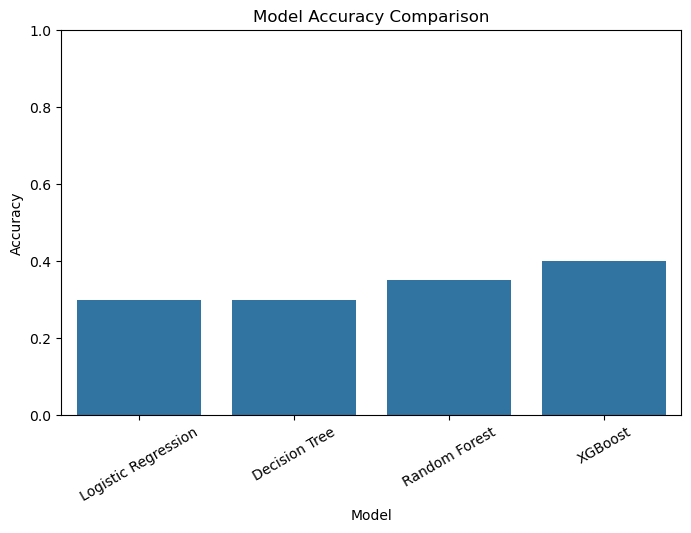

In [90]:
df_results = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
})

plt.figure(figsize=(8,5))
sns.barplot(data=df_results, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=30)
plt.show()

#### 11. Conclusion

- Performed predictive analysis on the accident dataset to predict accident severity levels.
- Handled missing data and encoded categorical features for model training.
- Trained and evaluated multiple classification models: Logistic Regression, Decision Tree, Random Forest, and XGBoost.
- XGBoost achieved the highest accuracy (0.4000) among tested models.